## Photoelectrons comparison between CRY extracted and CORKSIKA for MDC2020ae

In [1]:
# External
import numpy as np
import uproot
import awkward as ak
import matplotlib.pyplot as plt

# Internal
sys.path.append(os.path.abspath("../PyMacros"))
import Utils as ut

In [2]:
# Get data

# My stuff
fileName1 = "/exp/mu2e/data/users/sgrant/CRVSim/CosmicCRYExtractedCatTriggered.MDC2020ae_best_v1_3.000/81168767/00/00000/nts.sgrant.CosmicCRYExtractedCatTriggered.MDC2020ae_best_v1_3.001205_00000014.root" 
with uproot.open(fileName1 + ":TrkAnaExt/trkana") as tree:
    data1_ = tree.arrays(["crvcoincs.PEs", "crvcoincs.PEsPerLayer[4]"])

# Natalie's
fileName2 = "/exp/mu2e/data/users/nmharris/nts.nmharris.trkana-reco.MDC2020ae_perfect_v1_3.001202_00000000_all_vars.root" 
with uproot.open(fileName2 + ":TrkAna/trkana") as tree:
    data2_ = tree.arrays(["crvcoincs.PEs", "crvcoincs.PEsPerLayer[4]"])                            

In [3]:
def Plot1D(data, nbins=100, xmin=-1.0, xmax=1.0, title=None, xlabel=None, ylabel=None, fout="hist.png", legPos="best", logX=False, logY=False, stats=True, underOver=False, errors=False, NDPI=300):
    
    data = np.array(data)
    # data = np.flatten(data)

    # Create figure and axes
    fig, ax = plt.subplots()

    # Plot the histogram with outline
    counts, bin_edges, _ = ax.hist(data, bins=nbins, range=(xmin, xmax), histtype='step', edgecolor='black', linewidth=1.0, fill=False, density=False)

    # Log scale 
    if logY:
        ax.set_yscale('log')
    if logX:
        ax.set_xscale('log')
        
    # Set x-axis limits
    ax.set_xlim(xmin, xmax)

    # Calculate statistics
    N, mean, meanErr, stdDev, stdDevErr, underflows, overflows = ut.GetBasicStats(data, xmin, xmax)

    # # Create legend text
    # legendText = f"Entries: {N}\nMean: {ut.ut.Round(mean, 3)}\nStd Dev: {ut.ut.Round(stdDev, 3)}"
    # if errors: legendText = f"Entries: {N}\nMean: {ut.ut.Round(mean, 3)}$\pm${ut.ut.Round(meanErr, 1)}\nStd Dev: {ut.ut.Round(stdDev, 3)}$\pm${ut.ut.Round(stdDevErr, 1)}"
    # if underOver: legendText += f"\nUnderflows: {underflows}\nOverflows: {overflows}"

    # # Create legend text
    legendText = f"Entries: {N}\nMean: {ut.Round(mean, 3)}\nStd Dev: {ut.Round(stdDev, 3)}"
    # if errors: legendText = f"Entries: {N}\nMean: {ut.Round(mean, 3)}$\pm${ut.Round(meanErr, 1)}\nStd Dev: {ut.Round(stdDev, 3)}$\pm${ut.Round(stdDevErr, 1)}"
    if errors: legendText = f"Entries: {N}\nMean: {ut.Round(mean, 4)}" + rf"$\pm$" + f"{ut.Round(meanErr, 1)}\nStd Dev: {ut.Round(stdDev, 4)}" rf"$\pm$" + f"{ut.Round(stdDevErr, 1)}"
    if underOver: legendText += f"\nUnderflows: {underflows}\nOverflows: {overflows}"


    # Add legend to the plot
    if stats: ax.legend([legendText], loc=legPos, frameon=False, fontsize=13)

    ax.set_title(title, fontsize=15, pad=10)
    ax.set_xlabel(xlabel, fontsize=13, labelpad=10) 
    ax.set_ylabel(ylabel, fontsize=13, labelpad=10) 

    # Set font size of tick labels on x and y axes
    ax.tick_params(axis='x', labelsize=13)  # Set x-axis tick label font size
    ax.tick_params(axis='y', labelsize=13)  # Set y-axis tick label font size

    # ut.ScientificNotation(ax)

    plt.tight_layout()

    plt.savefig(fout, dpi=NDPI, bbox_inches="tight")
    plt.show()

    # Clear memory
    plt.close()

    print("\n---> Written:\n\t", fout)

    return

In [4]:
def Plot1DOverlay(hists_, nbins=100, xmin=-1.0, xmax=1.0, title=None, xlabel=None, ylabel=None, fout="hist.png", label_=None, legPos="best", logX=False, logY=False, NDPI=300, includeBlack=False, legFontSize=12):

    # Create figure and axes
    fig, ax = plt.subplots()

    # Iterate over the hists and plot each one
    for i, (label, hist) in enumerate(hists_.items()):
        colour = ut.colours[i]
        if not includeBlack: colour = ut.colours[i+1]
        counts, bin_edges, _ = ax.hist(hist, bins=nbins, range=(xmin, xmax), histtype='step', edgecolor=colour, linewidth=1.0, fill=False, density=False, color=colour, label=label, log=logY)

    # Log scale 
    if logY:
        ax.set_yscale('log')
    if logX:
        ax.set_xscale('log')
        
    # Set x-axis limits
    ax.set_xlim(xmin, xmax)

    ax.set_title(title, fontsize=16, pad=10)
    ax.set_xlabel(xlabel, fontsize=14, labelpad=10) 
    ax.set_ylabel(ylabel, fontsize=14, labelpad=10) 

    # Set font size of tick labels on x and y axes
    ax.tick_params(axis='x', labelsize=14)  # Set x-axis tick label font size
    ax.tick_params(axis='y', labelsize=14)  # Set y-axis tick label font size
    
    # ut.ScientificNotation(ax)

    # Add legend to the plot
    ax.legend(loc=legPos, frameon=False, fontsize=legFontSize)

    plt.tight_layout()

    plt.savefig(fout, dpi=NDPI, bbox_inches="tight")
    plt.show()

    # Clear memory
    plt.close()

    print("\n---> Written:\n\t", fout)

    return

/tmp/ipykernel_394747/3502071750.py:19: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(xmin, xmax)


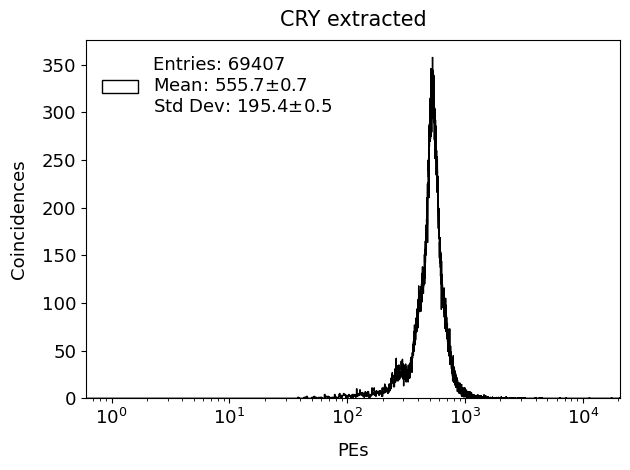


---> Written:
	 ../Images/MDC2020ae/PEs//h1_PEs_CRY.png


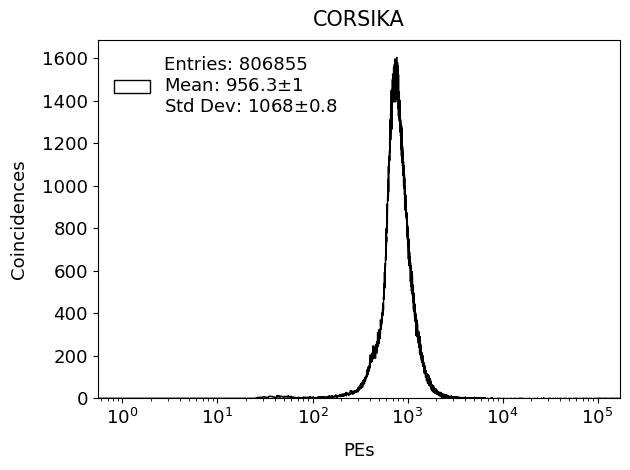


---> Written:
	 ../Images/MDC2020ae/PEs//h1_PEs_CORKSIKA.png


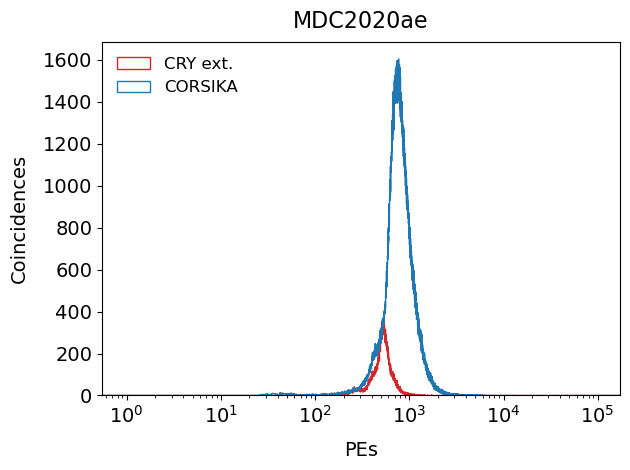


---> Written:
	 ../Images/MDC2020ae/PEs//h1_PEs_overlay.png


In [5]:
PEs1_ = ak.flatten(data1_["crvcoincs.PEs"], axis=None)
Plot1D(PEs1_, nbins=int(np.max(PEs1_)), title="CRY extracted", xlabel="PEs", ylabel="Coincidences", fout="../Images/MDC2020ae/PEs//h1_PEs_CRY.png", xmin=0, xmax=np.max(PEs1_), underOver=False, logX=True, errors=True)

PEs2_ = ak.flatten(data2_["crvcoincs.PEs"], axis=None)
Plot1D(PEs2_, nbins=int(np.max(PEs2_)), title="CORSIKA", xlabel="PEs", ylabel="Coincidences", fout="../Images/MDC2020ae/PEs//h1_PEs_CORKSIKA.png", xmin=0, xmax=np.max(PEs2_), underOver=False, logX=True, errors=True)

Plot1DOverlay({"CRY ext." : PEs1_, 
               "CORSIKA" : PEs2_ },
               nbins=int(np.max(PEs2_)), xmin=0, xmax=np.max(PEs2_),
               title="MDC2020ae", xlabel="PEs", ylabel="Coincidences", fout="../Images/MDC2020ae/PEs//h1_PEs_overlay.png",
               logX=True, legPos="upper left")


/tmp/ipykernel_394747/1351271023.py:19: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(xmin, xmax)


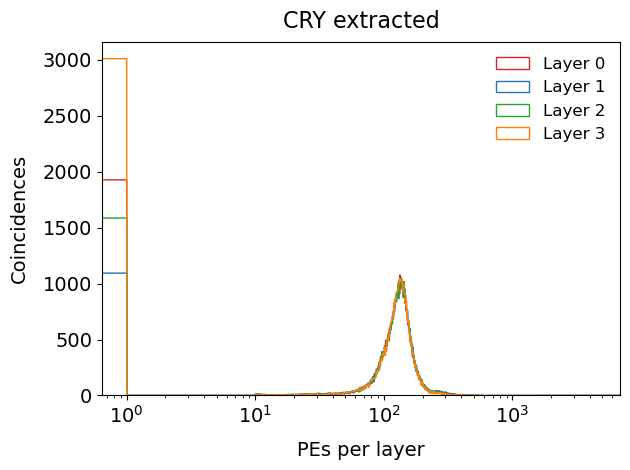


---> Written:
	 ../Images/MDC2020ae/PEs//h1_PEsPerLayer_1.png


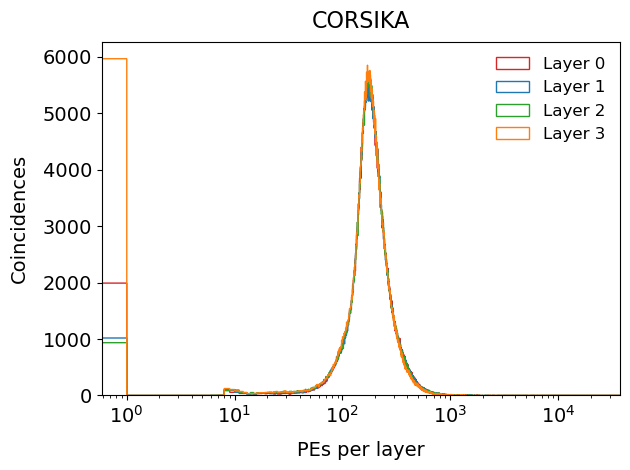


---> Written:
	 ../Images/MDC2020ae/PEs//h1_PEsPerLayer_2.png


In [6]:
PEsPerLayer1_0 = ak.flatten(data1_["crvcoincs.PEsPerLayer[4]"][:,:,0], axis=None)

Plot1DOverlay({"Layer 0" : PEsPerLayer1_0, 
               "Layer 1" : ak.flatten(data1_["crvcoincs.PEsPerLayer[4]"][:,:,1], axis=None),
               "Layer 2" : ak.flatten(data1_["crvcoincs.PEsPerLayer[4]"][:,:,2], axis=None),
               "Layer 3" : ak.flatten(data1_["crvcoincs.PEsPerLayer[4]"][:,:,3], axis=None) },
               nbins=int(np.max(PEsPerLayer1_0)), xmin=0, xmax=np.max(PEsPerLayer1_0),
               title="CRY extracted", xlabel="PEs per layer", ylabel="Coincidences", fout="../Images/MDC2020ae/PEs//h1_PEsPerLayer_1.png", 
               logX=True)

PEsPerLayer2_0 = ak.flatten(data2_["crvcoincs.PEsPerLayer[4]"][:,:,0], axis=None)

Plot1DOverlay({"Layer 0" : PEsPerLayer2_0, 
               "Layer 1" : ak.flatten(data2_["crvcoincs.PEsPerLayer[4]"][:,:,1], axis=None),
               "Layer 2" : ak.flatten(data2_["crvcoincs.PEsPerLayer[4]"][:,:,2], axis=None),
               "Layer 3" : ak.flatten(data2_["crvcoincs.PEsPerLayer[4]"][:,:,3], axis=None) },
               nbins=int(np.max(PEsPerLayer2_0)), xmin=0, xmax=np.max(PEsPerLayer2_0),
               title="CORSIKA", xlabel="PEs per layer", ylabel="Coincidences", fout="../Images/MDC2020ae/PEs//h1_PEsPerLayer_2.png", 
               logX=True)